In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from t4gpd.morph.STGrid import STGrid

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = countries.query('"France" == name')
wgs84_roi = Polygon([(-10, 40), (-10, 52), (10, 52), (10, 40)])
countries = gpd.clip(countries, wgs84_roi)
countries = countries.to_crs("EPSG:2154")

In [3]:
grid = STGrid(countries, 2e5, dy=None, indoor='both', intoPoint=False).run()
print(grid.columns)

Index(['geometry', 'gid', 'indoor'], dtype='object')


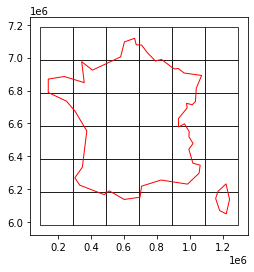

In [4]:
basemap = countries.boundary.plot(color='red', linewidth=1.0)
grid.plot(ax=basemap, edgecolor='black', color='white', alpha=0.75)
plt.show()